# Materials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import seaborn as sns

# Create a random dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/UoMAICrash/refs/heads/main/data/Wine_Quality_Data.csv')

In [3]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [9]:
df.shape

(6497, 16)

# Plot data

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.200272     0.270568   
volatile_acidity           0.200272          1.000000    -0.295129   
citric_acid                0.270568         -0.295129     1.000000   
residual_sugar            -0.032254         -0.064384     0.074920   
chlorides                  0.355964          0.415896    -0.074084   
free_sulfur_dioxide       -0.259914         -0.365673     0.122058   
total_sulfur_dioxide      -0.233259         -0.343534     0.159355   
density                    0.434056          0.261437     0.065690   
pH                        -0.250044          0.194876    -0.285905   
sulphates                  0.220145          0.255042     0.036898   
alcohol                   -0.110650         -0.023924     0.019653   
quality                   -0.098154         -0.257806     0.105711   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

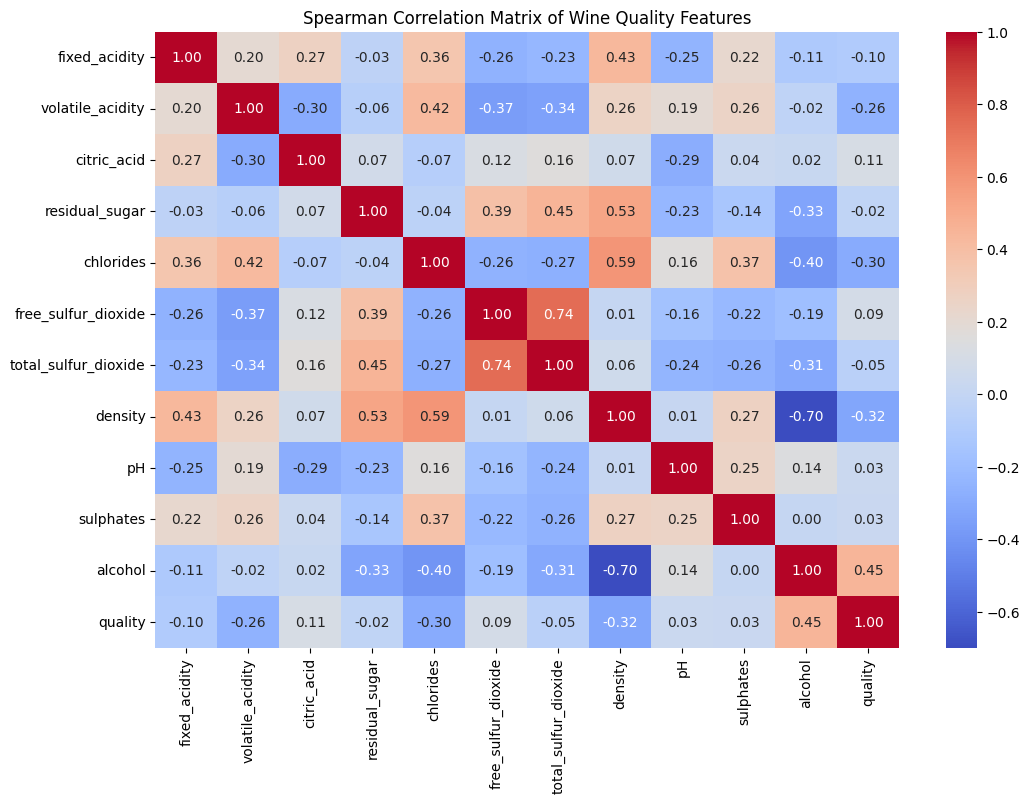

In [5]:
# prompt: give the correlation  matrix
# for fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality. use spearman

correlation_matrix = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                         'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                         'pH', 'sulphates', 'alcohol', 'quality']].corr(method='spearman')

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Wine Quality Features')
plt.show()

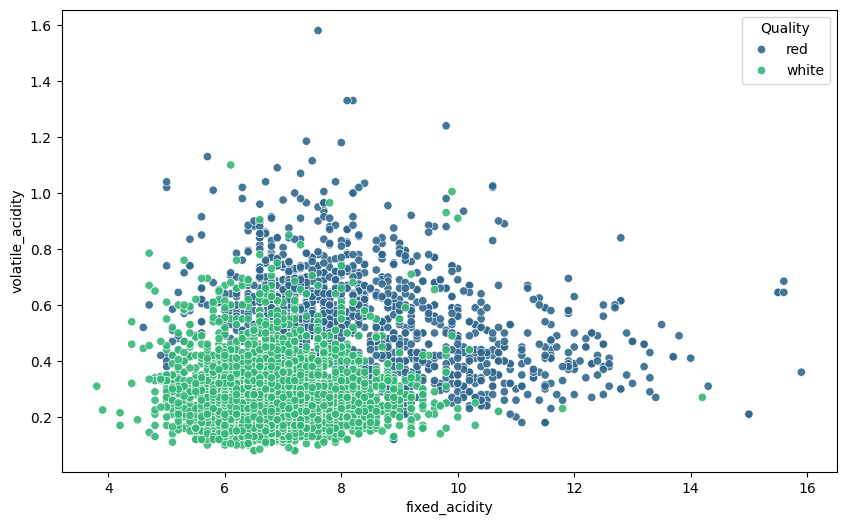

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fixed_acidity', y='volatile_acidity', hue='color', palette='viridis', alpha=0.9)


#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Quality')
plt.show()


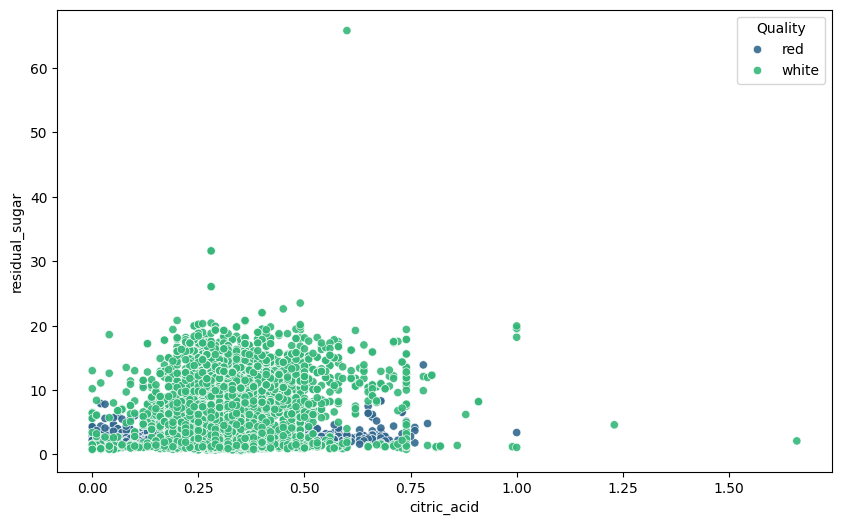

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='citric_acid', y= 'residual_sugar', hue='color', palette='viridis', alpha=0.9)


#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Quality')
plt.show()


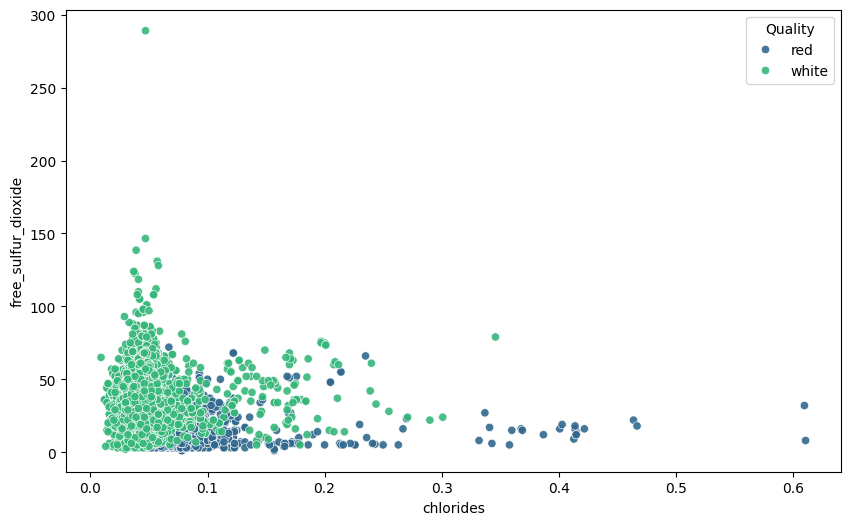

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='chlorides', y= 'free_sulfur_dioxide', hue='color', palette='viridis', alpha=0.9)



#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Quality')
plt.show()


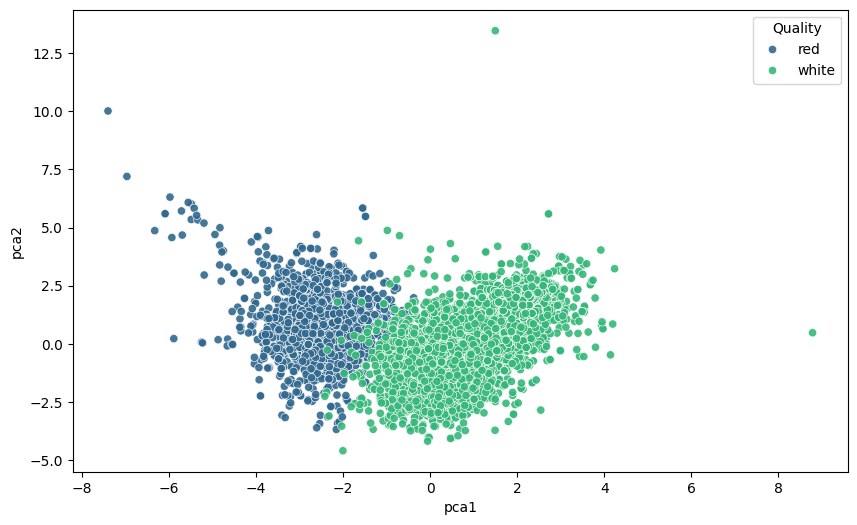

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y= 'pca2', hue='color', palette='viridis', alpha=0.9)


plt.legend(title='Quality')
plt.show()


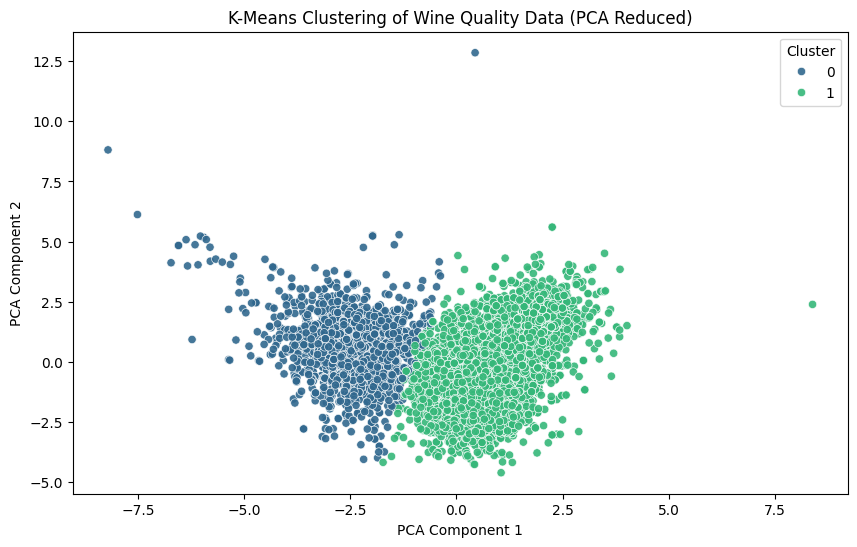


Cluster Analysis:
         fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
cluster                                                                 
0             8.278837          0.530438     0.269688        2.637710   
1             6.847950          0.273771     0.335539        6.412301   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
cluster                                                                   
0         0.087811            15.750899             49.374101  0.996708   
1         0.045058            35.628598            138.669807  0.994002   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.307818   0.653921  10.388729  5.573141  
1        3.187650   0.488902  10.527403  5.903086  


In [10]:
# prompt: lets use 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality', 'color' and do k-means ..lokking for 3 clusters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # Set n_init explicitly
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using PCA for dimensionality reduction for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', alpha=0.9)
plt.title('K-Means Clustering of Wine Quality Data (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each cluster
print("\nCluster Analysis:")
print(df.groupby('cluster')[features].mean())

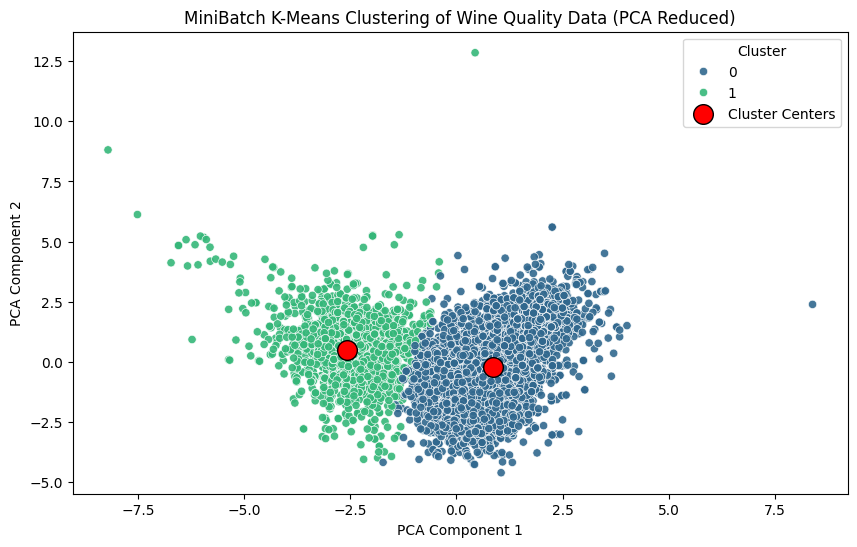


MiniBatch K-Means Cluster Analysis:
                   fixed_acidity  volatile_acidity  citric_acid  \
minibatch_cluster                                                 
0                       6.851541          0.274102     0.335513   
1                       8.274413          0.530557     0.269488   

                   residual_sugar  chlorides  free_sulfur_dioxide  \
minibatch_cluster                                                   
0                        6.408416   0.045071            35.607423   
1                        2.633113   0.087951            15.728778   

                   total_sulfur_dioxide   density        pH  sulphates  \
minibatch_cluster                                                        
0                            138.617969  0.994006  3.187316   0.488526   
1                             49.148706  0.996707  3.309296   0.655713   

                     alcohol   quality  
minibatch_cluster                       
0                  10.523497  5.897643

In [15]:
# prompt: lets do the clustering with kemans minibatch. draw the center circle

from sklearn.cluster import MiniBatchKMeans

# Apply MiniBatch K-Means clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, n_init=10, batch_size=100)
df['minibatch_cluster'] = minibatch_kmeans.fit_predict(X_scaled)

# Get the cluster centers from MiniBatchKMeans and transform them using the fitted PCA
cluster_centers_scaled = minibatch_kmeans.cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers_scaled)

# Visualize the clusters with MiniBatchKMeans and draw centers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='minibatch_cluster', palette='viridis', alpha=0.9)
plt.title('MiniBatch K-Means Clustering of Wine Quality Data (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Draw the cluster centers
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='o', c='red', s=200, edgecolor='black', label='Cluster Centers')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each MiniBatchKMeans cluster
print("\nMiniBatch K-Means Cluster Analysis:")
print(df.groupby('minibatch_cluster')[features].mean())